In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
ages_df = pd.read_csv("AGEs.csv")
arm_df = pd.read_csv("innerArm.csv")
thumbnail_df = pd.read_csv("thumbNail.csv")
earlobe_df = pd.read_csv("earLobe.csv")
vein_df = pd.read_csv("vein.csv")

In [3]:
def polyFit(df):
    polynomial = 5
    gradient = 0.05
    df
    return df

In [4]:
def crop_range_to_numpy(df):
    
    # Dropping columns : ['patientID', 'has_DM2']
    df_dropped_index = df.drop(labels=['patientID', 'has_DM2'], axis=1, inplace=False)
    
    # Cropping raman shift from range 800 cm-1 to 1800cm-1
    cropped_signal = df_dropped_index.loc[:, 'Var802':'Var1801']
    
    # Convert data to numpy.ndarray
    cropped_signal_np = cropped_signal.to_numpy()
    
    # Dropping the first index corresponding to label : ramanShift
    cropped_signal_np = cropped_signal_np[1:]
    
    return cropped_signal_np

In [5]:
arm_df

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0
5,DM205,1.0,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,179.800000,...,0,0,0,0,0,0,0,0,0,0
6,DM206,1.0,237.400000,237.400000,237.400000,237.400000,237.400000,237.400000,237.400000,237.400000,...,0,0,0,0,0,0,0,0,0,0
7,DM207,1.0,217.333333,217.333333,217.333333,217.333333,217.333333,217.333333,217.333333,217.333333,...,0,0,0,0,0,0,0,0,0,0
8,DM208,1.0,89.166667,89.166667,89.166667,89.166667,89.166667,89.166667,89.166667,89.166667,...,0,0,0,0,0,0,0,0,0,0
9,DM209,1.0,336.600000,336.600000,336.600000,336.600000,336.600000,336.600000,336.600000,336.600000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = crop_range_to_numpy(arm_df)
y = arm_df['has_DM2'].drop(0, inplace=False).to_numpy()

In [16]:
X[0]

array([345.8314642, 350.6934332, 351.9772339, 350.0312932, 347.838913 ,
       345.068044 , 342.5713069, 343.5454356, 344.5195618, 344.4756978,
       344.2507731, 342.2878418, 339.2869644, 336.8926926, 335.39136  ,
       333.7099559, 331.2312902, 328.7526271, 333.0921478, 337.6766358,
       337.9337082, 336.7305095, 338.165858 , 341.9280955, 342.5705134,
       336.4720688, 331.7892405, 339.4733149, 347.1573894, 341.1544673,
       333.4658229, 332.7932104, 335.4330343, 337.6837972, 339.495046 ,
       340.5178502, 339.309639 , 338.1054713, 336.9720917, 335.8387273,
       338.1675542, 341.1160609, 340.4624049, 337.8147303, 337.3335953,
       339.6043727, 341.2791189, 341.0519053, 340.8592631, 341.5413106,
       342.2233581, 339.3441061, 335.78022  , 334.7430852, 335.1224543,
       333.9846776, 330.9479752, 330.1594696, 336.1605403, 341.6088257,
       337.5043945, 333.399971 , 334.0788498, 335.5238596, 334.9285177,
       333.3304545, 332.4634221, 332.3872859, 332.7996902, 334.3

In [8]:
# Tensorflow
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

# Metrics evaluator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, shuffle=True, test_size=0.2)

In [10]:
X_train.shape

(16, 1000)

In [11]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(14, input_dim=1000, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='softmax')
  ])

In [12]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2022-03-11 03:38:14.431038: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-11 03:38:14.431926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



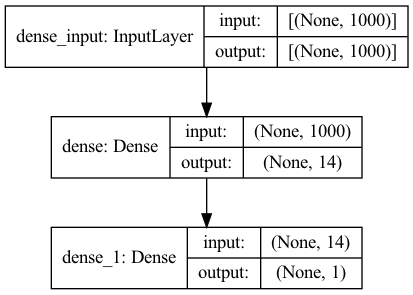

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit()